In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtb
%matplotlib inline


In [6]:
dataset = pd.read_csv("loan-train.csv.xls")
# 2 datasets, train and test

In [7]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
dataset.shape

(614, 13)

In [9]:
dataset.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [10]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
pd.crosstab(dataset["Credit_History"], dataset["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

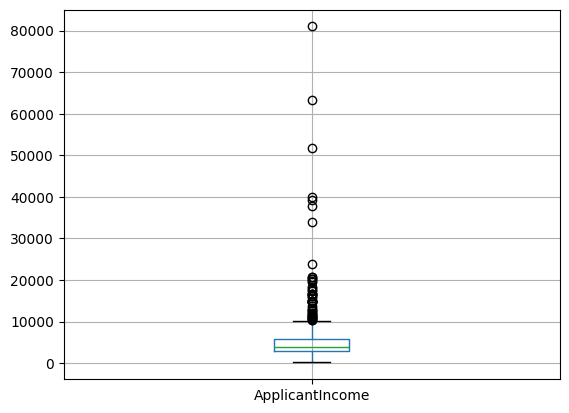

In [14]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

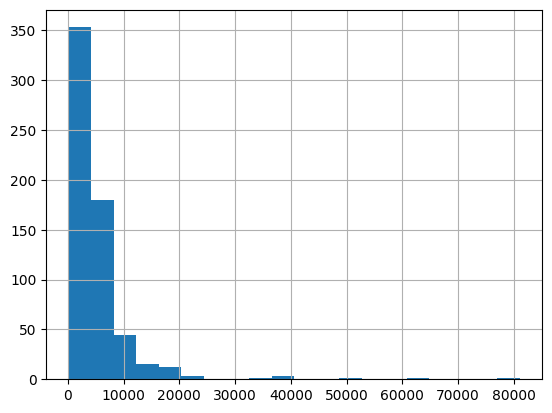

In [15]:
dataset["ApplicantIncome"].hist(bins=20)
#right skewd so will have to normalize this

<Axes: >

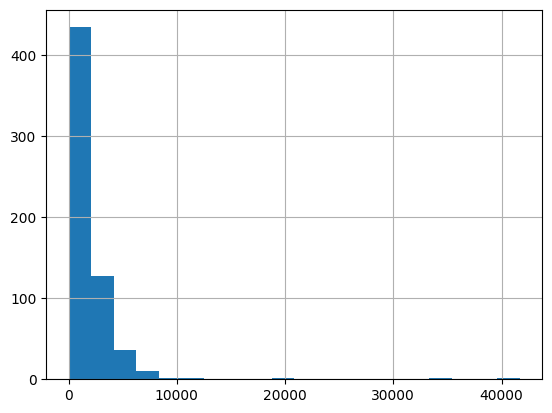

In [16]:
dataset["CoapplicantIncome"].hist(bins=20)
#right skewd so will have to normalize this

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

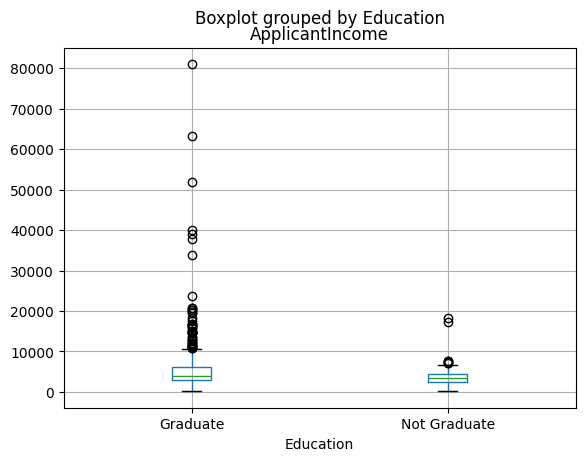

In [17]:
dataset.boxplot(column = 'ApplicantIncome', by = 'Education')

<Axes: >

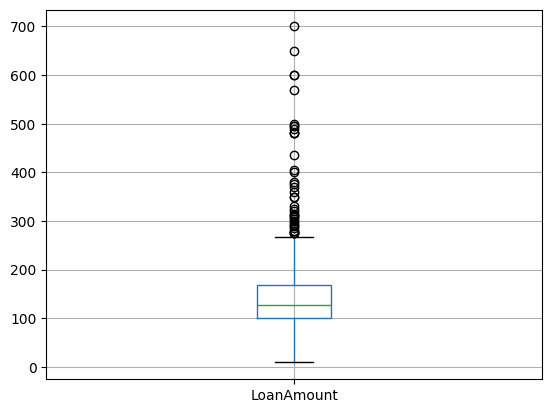

In [18]:
dataset.boxplot(column= "LoanAmount")

<Axes: >

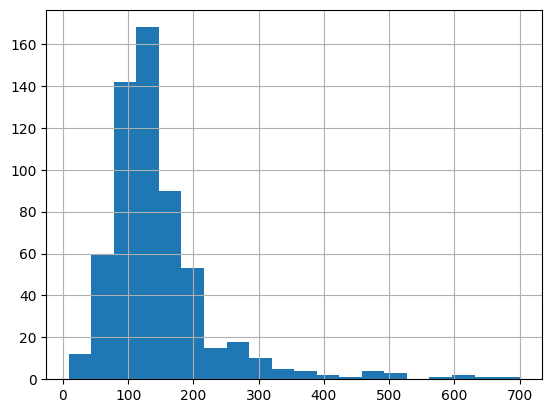

In [19]:
dataset["LoanAmount"].hist(bins=20)

<Axes: >

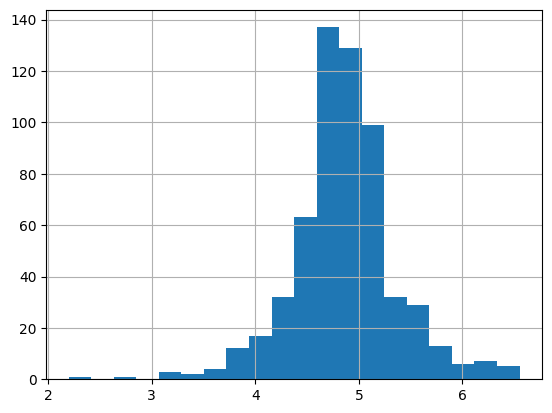

In [23]:
#Normalizing
dataset["LoanAmount_log"] = np.log(dataset["LoanAmount"])
dataset["LoanAmount_log"].hist(bins=20)

In [24]:
# Finding Missing Values
dataset.isnull()         

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# Finding Sum of Missingnt Values
dataset.isnull().sum()       

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [40]:
#Filling the null values in a particular column (Gender, Married, Dependents...etc.) with the Mode of the said Column.
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(),inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

In [41]:
dataset.isnull().sum()

#Yay

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [56]:
dataset["TotalIncome"] = dataset["ApplicantIncome"] + dataset["CoapplicantIncome"]
print(dataset["TotalIncome"].sum())


1990889.8399772798


In [70]:
#Normalize

dataset["TotalIncome_log"] = np.log(dataset["TotalIncome"])

# "+1" to avoid -inf values
dataset["TotalIncome_log"] = np.log(dataset["TotalIncome"] + 1)

#Replacing "0" values with mode of the column
total_income_mode = dataset.loc[dataset["TotalIncome_log"] > 0, "TotalIncome_log"].mode()[0]
dataset["TotalIncome_log"] = dataset["TotalIncome_log"].replace(0, total_income_mode)
print(dataset["TotalIncome_log"])




0      8.111628
1      8.012018
2      8.111628
3      8.458928
4      8.111628
         ...   
609    8.111628
610    8.111628
611    6.175867
612    8.111628
613    8.111628
Name: TotalIncome_log, Length: 614, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

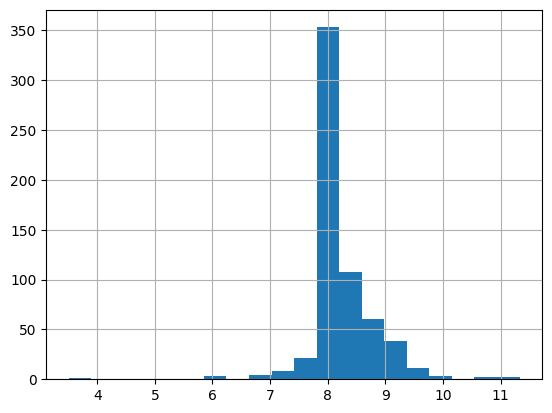

In [68]:
dataset["TotalIncome_log"].hist(bins=20)

In [71]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,TotalIncome_final
0,LP001002,Male,No,0,Graduate,No,0.0,0.0,120.0,360.0,1.0,Urban,Y,4.787492,0.0,8.111628,-inf
1,LP001003,Male,Yes,1,Graduate,No,1508.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,3016.0,8.012018,2.080943
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,0.0,8.111628,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4716.0,8.458928,2.135222
4,LP001008,Male,No,0,Graduate,No,0.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,0.0,8.111628,-inf


In [106]:
X = dataset.iloc[:, np.r_[1:5,9:12,14:16]]
x = x.to_numpy()
y = dataset.iloc[:, 12].values

In [107]:
x

array([['Male', 'No', '0', ..., 'Urban', 0.0, 8.11162807830774],
       ['Male', 'Yes', '1', ..., 'Rural', 3016.0, 8.012018239159062],
       ['Male', 'Yes', '0', ..., 'Urban', 0.0, 8.11162807830774],
       ...,
       ['Male', 'Yes', '1', ..., 'Urban', 480.0, 6.175867270105761],
       ['Male', 'Yes', '2', ..., 'Urban', 0.0, 8.11162807830774],
       ['Female', 'No', '0', ..., 'Semiurban', 0.0, 8.11162807830774]],
      dtype=object)

In [104]:
y 

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [108]:
print(x_train)

     Gender Married Dependents     Education  Loan_Amount_Term  \
90     Male     Yes          0      Graduate             360.0   
533    Male      No          1      Graduate             360.0   
452    Male     Yes          0      Graduate             360.0   
355  Female      No          0      Graduate             180.0   
266    Male     Yes          2      Graduate             360.0   
..      ...     ...        ...           ...               ...   
277    Male     Yes          0      Graduate             360.0   
9      Male     Yes          1      Graduate             360.0   
359    Male     Yes         3+      Graduate             360.0   
192    Male     Yes          0  Not Graduate             360.0   
559  Female     Yes          0      Graduate             360.0   

     Credit_History Property_Area  TotalIncome  TotalIncome_log  
90         1.000000     Semiurban       5800.0         8.665786  
533        0.842199     Semiurban          0.0         8.111628  
452      

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()


In [110]:
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])

In [111]:
print(x_train)

[[1 1 0 ... 'Semiurban' 5800.0 8.665785595466064]
 [1 0 1 ... 'Semiurban' 0.0 8.11162807830774]
 [1 1 0 ... 'Rural' 3466.0 8.151044945685024]
 ...
 [1 1 3 ... 'Semiurban' 6334.0 8.75384509275524]
 [1 1 0 ... 'Urban' 0.0 8.11162807830774]
 [0 1 0 ... 'Semiurban' 4612.0 8.43663368355782]]


In [114]:
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])
x_train[:,6] = labelencoder_x.fit_transform(x_train[:,6])

In [115]:
print(x_train)

[[1 1 0 ... 1 160 8.665785595466064]
 [1 0 1 ... 1 0 8.11162807830774]
 [1 1 0 ... 0 68 8.151044945685024]
 ...
 [1 1 3 ... 1 172 8.75384509275524]
 [1 1 0 ... 2 0 8.11162807830774]
 [0 1 0 ... 1 129 8.43663368355782]]


In [116]:
labelencoder_y = LabelEncoder()

In [117]:
y_train = labelencoder_y.fit_transform(y_train)

In [118]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [119]:
for i in range(0,5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])


x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])
x_test[:,6] = labelencoder_x.fit_transform(x_test[:,6])

y_test = labelencoder_y.fit_transform(y_test)

In [120]:
x_test

array([[1, 0, 0, ..., 1, 0, 8.11162807830774],
       [0, 0, 0, ..., 1, 0, 8.11162807830774],
       [1, 1, 0, ..., 2, 58, 8.963544291996744],
       ...,
       [1, 1, 0, ..., 1, 0, 8.11162807830774],
       [1, 1, 3, ..., 2, 20, 8.110427237575024],
       [1, 1, 1, ..., 2, 23, 8.19063168090354]], dtype=object)

In [121]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [123]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [125]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [126]:
from sklearn import metrics
print("The accuracy of Decision Tree is:", metrics.accuracy_score(y_pred,y_test))


The accuracy of Decision Tree is: 0.5040650406504065


In [127]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [128]:
y_pred = nbc.predict(x_test)

In [129]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [130]:
print("The accuracy of Naive Bayes is: ", metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is:  0.8292682926829268


In [131]:
testdata = pd.read_csv("loan-test.csv.xls")
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [132]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [133]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [147]:
testdata["LoanAmount_log"] = np.log(testdata["LoanAmount"])

In [149]:
dataset["TotalIncome"] = dataset["ApplicantIncome"] + dataset["CoapplicantIncome"]
print(dataset["TotalIncome"].sum())

#Normalize

dataset["TotalIncome_log"] = np.log(dataset["TotalIncome"])

# "+1" to avoid -inf values
dataset["TotalIncome_log"] = np.log(dataset["TotalIncome"] + 1)

#Replacing "0" values with mode of the column
total_income_mode = dataset.loc[dataset["TotalIncome_log"] > 0, "TotalIncome_log"].mode()[0]
dataset["TotalIncome_log"] = dataset["TotalIncome_log"].replace(0, total_income_mode)
print(dataset["TotalIncome_log"])


1990889.8399772798
0      8.111628
1      8.012018
2      8.111628
3      8.458928
4      8.111628
         ...   
609    8.111628
610    8.111628
611    6.175867
612    8.111628
613    8.111628
Name: TotalIncome_log, Length: 614, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [150]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
testdata['LoanAmount_log'].fillna(testdata['LoanAmount_log'].mean(),inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(),inplace=True)

In [151]:
testdata.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [ ]:
X = testdata.iloc[:, np.r_[1:5,9:12,14:16]]
x = x.to_numpy()
y = testdata.iloc[:, 12].values

testdata["TotalIncome"] = testdata["ApplicantIncome"] + testdata["CoapplicantIncome"]
print(testdata["TotalIncome"].sum())

#Normalize

testdata["TotalIncome_log"] = np.log(testdata["TotalIncome"])

# "+1" to avoid -inf values
testdata["TotalIncome_log"] = np.log(testdata["TotalIncome"] + 1)

#Replacing "0" values with mode of the column
total_income_mode = testdata.loc[testdata["TotalIncome_log"] > 0, "TotalIncome_log"].mode()[0]
testdata["TotalIncome_log"] = testdata["TotalIncome_log"].replace(0, total_income_mode)
print(testdata["TotalIncome_log"])



In [154]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])

x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])
x_train[:,6] = labelencoder_x.fit_transform(x_train[:,6])

labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)





In [153]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [155]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train,y_train)

y_pred = nbc.predict(x_test)
print("The accuracy of Naive Bayes is: ", metrics.accuracy_score(y_pred,y_test))



The accuracy of Naive Bayes is:  0.8048780487804879


In [156]:
#final result

y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])